In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
df=pd.read_csv(r"C:\Users\MY Laptop\Desktop\guvi_class\Customer Conversion Analysis\train_data.csv")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [3]:
country_mapping = {
    1:'Australia',
    2:'Austria',
    3:'Belgium',
    4:'British Virgin Islands',
    5:'Cayman Islands',
    6:'Christmas Island',
    7:'Croatia',
    8:'Cyprus',
    9:'Czech Republic',
    10:'Denmark',
    11:'Estonia',
    12:'unidentified',
    13:'Faroe Islands',
    14:'Finland',
    15:'France',
    16:'Germany',
    17:'Greece',
    18:'Hungary',
    19:'Iceland',
    20:'India',
    21:'Ireland',
    22:'Italy',
    23:'Latvia',
    24:'Lithuania',
    25:'Luxembourg',
    26:'Mexico',
    27:'Netherlands',
    28:'Norway',
    29:'Poland',
    30:'Portugal',
    31:'Romania',
    32:'Russia',
    33:'San Marino',
    34:'Slovakia',
    35:'Slovenia',
    36:'Spain',
    37:'Sweden',
    38:'Switzerland',
    39:'Ukraine',
    40:'United Arab Emirates',
    41:'United Kingdom',
    42:'USA',
    43:'biz (.biz)',
    44:'com (.com)',
    45:'int (.int)',
    46:'net (.net)',
    47:'org (*.org)'
}
page1={
    1:'trousers',
    2:'skirts',
    3:'blouses',
    4:'sale'
}

colors={
    1:'beige',
    2:'black',
    3:'blue',
    4:'brown',
    5:'burgundy',
    6:'gray',
    7:'green',
    8:'navy blue',
    9:'of many colors',
    10:'olive',
    11:'pink',
    12:'red',
    13:'violet',
    14:'white'
}

locations={
    1:'top left',
    2:'top in the middle',
    3:'top right',
    4:'bottom left',
    5:'bottom in the middle',
    6:'bottom right'

}

model_photo={
    1:'en face',
    2:'profile'

}

clothing_model={

    'C20':'C', 'B26':'B','C13':'C','B11':'B','B31':'B','C38':'C',
    'C24':'C','C45':'C','B24':'B','A11':'A','P39':'P','P18':'P','P16':'P','P11':'P','A3':'A','P1':'P','A13':'A',
    'C26':'C','B17':'B','A7':'A','C12':'C','A2':'A','P2':'P','P4':'P','C18':'C','P3':'P','P43':'P','C41':'C',
    'C10':'C','C25' :'C','P60' :'P','P77' :'P','C33' :'C','A10' :'A','B34' :'B','P8' :'P','A25':'A','A6' :'A','B10':'B',
    'P12':'P', 'A30':'A', 'C14':'C','C19':'C', 'C40':'C','A8' :'A','A21' :'A','A22' :'A','A5' :'A','C11':'C','A16' :'A',
    'A29' :'A','B20' :'A','C5' :'C','P55' :'P','P80' :'P','P51' :'P','B25' :'B','C35' :'C','C2' :'C','C17' :'C',
    'P14' :'P','P5':'P', 'A39':'A', 'C7':'C', 'P20':'P', 'P67':'P', 'P49':'P', 'P15':'P', 'C44':'C', 'A14':'A', 
    'C9':'C', 'P57':'P', 'P7':'P', 'A1':'A','A38':'A', 'B2':'B', 'P25':'P', 'B27':'B', 'P10':'P', 'P72':'P',
    'B32':'B', 'A33':'A', 'P17':'P', 'C54':'C', 'C56':'C', 'B4':'B','A4':'A', 'C27':'C', 'A15':'A', 'C4':'C',
    'A17':'A', 'A41':'A', 'P62':'P', 'A35':'A', 'P48' :'P','C46':'C', 'C6':'C', 'A18':'A','A37':'A', 'A12':'A',
    'P26':'P', 'P63':'P', 'B14':'B', 'C15':'C', 'P40':'P', 'A36':'A', 'B15':'B', 'P34':'P', 'A42':'A', 'C55':'C',
    'B21':'B', 'P61':'P', 'C8':'C', 'A9':'A', 'P33':'P', 'B8':'B', 'B23':'B', 'B1':'B', 'B13':'B', 'C53':'C', 
    'P29':'P', 'C16':'C', 'B6':'B','P73':'P', 'C50':'C', 'B16':'B', 'A20':'A', 'P42':'P', 'P74':'P', 'P35':'P',
    'A31':'A', 'A26':'A', 'B30':'B', 'P50':'P', 'A28':'A','A32':'A' ,'C59':'C', 'P75':'P', 'P70':'P', 'C48':'C', 
    'P47':'P', 'C58':'C', 'P6':'P', 'C51':'C', 'A27':'A', 'P68':'P','C21':'C', 'P38':'P', 'C32':'C', 'C30':'C', 'P23':'P', 'P9':'P',
    'P19':'P', 'P65':'P', 'C23':'C', 'B29':'B', 'B28':'B', 'B19':'B', 'C34':'C','C49':'C', 'C57':'C', 'P64':'P', 
    'B7':'B', 'C52':'C', 'P44':'P','P71':'P', 'P59':'P', 'A23':'A', 'P82':'P', 'P36':'P', 'B12':'B',
    'B33':'B', 'B9':'B', 'C1':'C', 'P32':'P', 'C42':'C', 'C36':'C', 'P30':'P', 'P37':'P', 'C43':'C', 'C39':'C', 
    'P56':'P', 'B3':'B','A34':'A', 'P76':'P', 'B22':'B', 'A43':'A', 'C3':'C', 'P13':'P', 'B5':'B', 'C28':'C',
    'A40':'A', 'C22':'C', 'C47':'C', 'C29':'C','P24':'P', 'A24':'A', 'P58':'P', 'A19':'A', 'P53':'P', 'C37':'C', 
    'P46':'P', 'P69':'P', 'C31':'C', 'P45':'P', 'P52':'P', 'P78':'P','P21':'P', 'P81':'P', 'P41':'P', 'P66':'P', 
    'P27':'P', 'P31' :'P','P79' :'P','P22':'P', 'P54':'P'
}

df['country']=df['country'].replace(country_mapping)
df['page1_main_category']=df['page1_main_category'].replace(page1)
df['colour']=df['colour'].replace(colors)
df['location']=df['location'].replace(locations)
df['model_photography']=df['model_photography'].replace(model_photo)
df['page2_clothing_model']=df['page2_clothing_model'].replace(clothing_model)
allowed_countries = ['Poland', 'Czech Republic', 'Lithuania', 'net (.net)', 'com (.com)']
df['country'] = df['country'].where(df['country'].isin(allowed_countries), 'Others')

In [4]:
df=pd.get_dummies(df,columns=['country',
'page1_main_category',
'colour',
'location',
'model_photography','page2_clothing_model'],
dtype='int')
scaler = MinMaxScaler()
stdscaler=StandardScaler()
df["month"] = scaler.fit_transform(df[["month"]])
df["day"] = stdscaler.fit_transform(df[["day"]])
df["order"] = stdscaler.fit_transform(df[["order"]])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   year                           132379 non-null  int64  
 1   month                          132379 non-null  float64
 2   day                            132379 non-null  float64
 3   order                          132379 non-null  float64
 4   session_id                     132379 non-null  int64  
 5   price                          132379 non-null  int64  
 6   price_2                        132379 non-null  int64  
 7   page                           132379 non-null  int64  
 8   country_Czech Republic         132379 non-null  int32  
 9   country_Lithuania              132379 non-null  int32  
 10  country_Others                 132379 non-null  int32  
 11  country_Poland                 132379 non-null  int32  
 12  country_com (.com)            

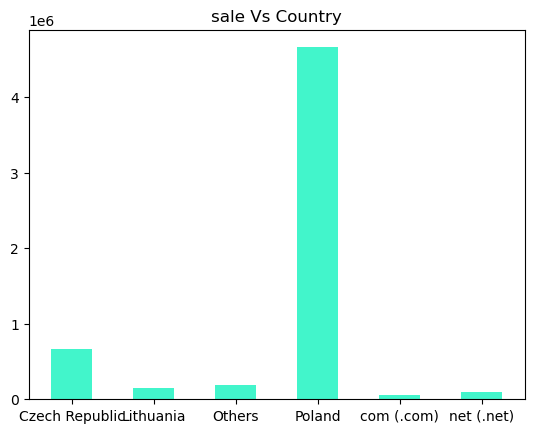

In [67]:
import seaborn as sns
import  matplotlib.pyplot as plt
country=sorted(df['country'].unique())
price=df.groupby('country')['price'].sum()
plt.bar(country,price,color='#42f5cb',width=0.5)
plt.title("sale Vs Country")
plt.show()

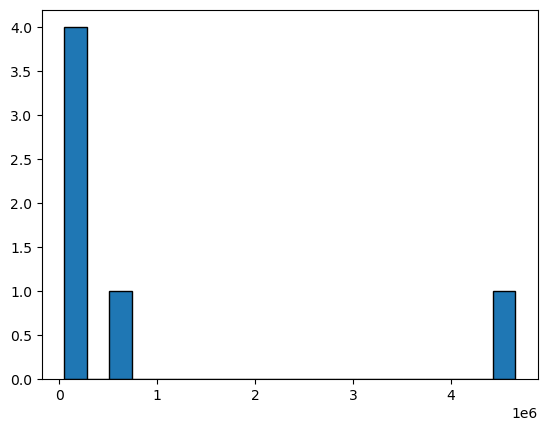

In [36]:
plt.hist(price,bins=20,edgecolor='black')
plt.show()

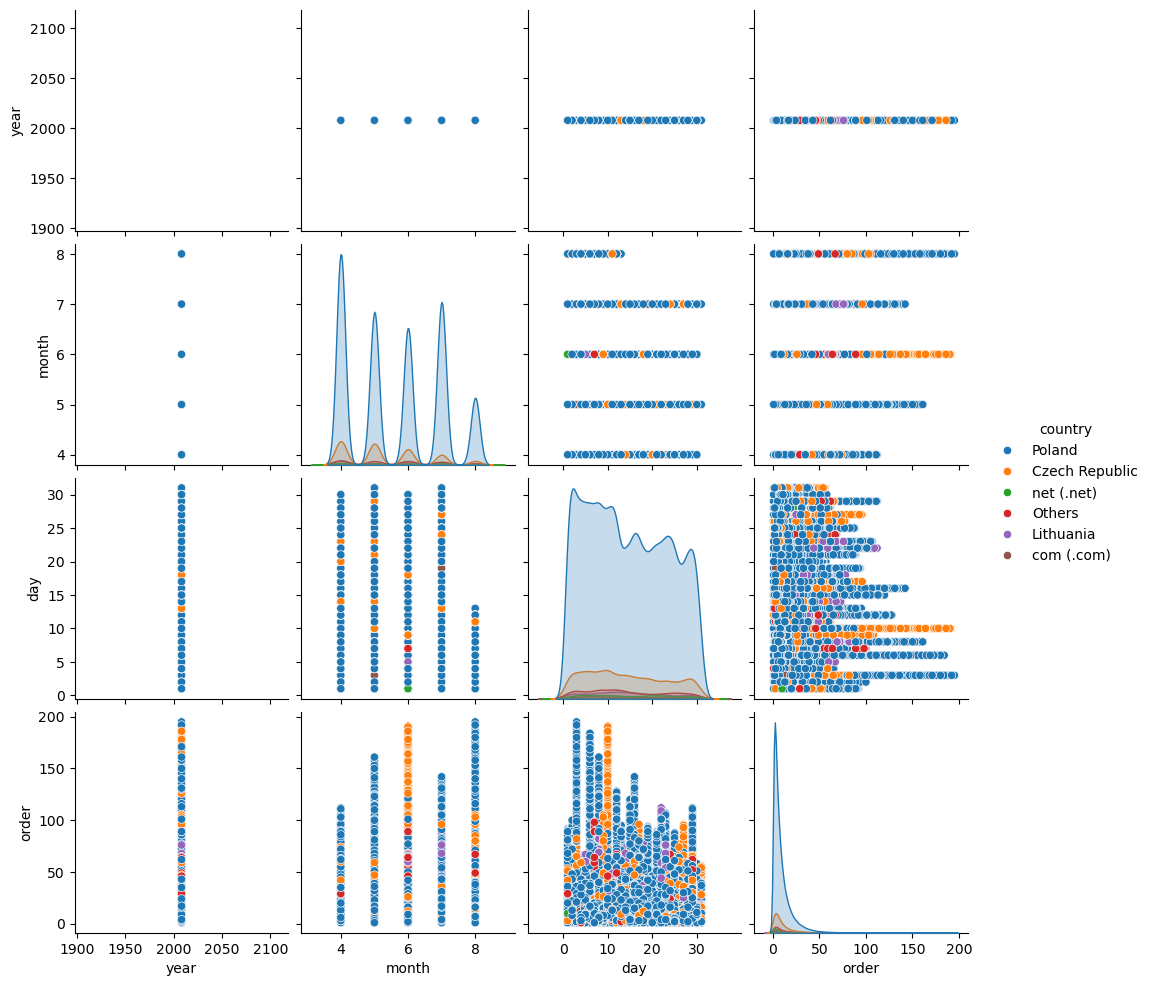

In [37]:
sns.pairplot(df, hue='country',vars=['year', 'month','day','order'])

# Analyze session duration, page views, and bounce rates

In [6]:
df.head()

,year,month,day,order,session_id,price,price_2,page,country_Czech Republic,country_Lithuania,...,location_bottom right,location_top in the middle,location_top left,location_top right,model_photography_en face,model_photography_profile,page2_clothing_model_A,page2_clothing_model_B,page2_clothing_model_C,page2_clothing_model_P
0,2008,0.50,0.848597,0.831323,15648,48,1,2,0,0,...,0,0,1,0,0,1,0,0,1,0
1,2008,0.25,0.508811,-0.283182,10018,57,1,2,0,0,...,0,0,0,1,1,0,0,1,0,0
2,2008,0.75,0.055762,-0.580383,19388,48,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2008,0.25,-1.416646,-0.580383,7181,43,2,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2008,0.50,-0.623811,0.459822,13493,57,1,2,0,0,...,0,0,0,0,1,0,0,1,0,0


In [4]:
df['session_duration']=(df['order']*30)/60

In [9]:
df.where(df['session_id']==1)

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,...,price,price_2,page,session_duration,session_date,bounced,weekday,hour,page_visited,click_sequence
1304,2008.0,4.0,1.0,5.0,Poland,1.0,skirts,B,brown,top right,...,52.0,1.0,1.0,2.5,2008-04-01,1.0,1.0,0.041667,page1,page1 → page1 → page1 → page1 → page4 → page4 ...
37541,2008.0,4.0,1.0,4.0,Poland,1.0,skirts,B,gray,bottom right,...,38.0,2.0,1.0,2.0,2008-04-01,1.0,1.0,0.033333,page1,page1 → page1 → page1 → page1 → page4 → page4 ...
65217,2008.0,4.0,1.0,2.0,Poland,1.0,trousers,A,beige,bottom right,...,33.0,2.0,1.0,1.0,2008-04-01,1.0,1.0,0.016667,page1,page1 → page1 → page1 → page1 → page4 → page4 ...
94740,2008.0,4.0,1.0,3.0,Poland,1.0,skirts,B,olive,top in the middle,...,52.0,1.0,1.0,1.5,2008-04-01,1.0,1.0,0.025000,page1,page1 → page1 → page1 → page1 → page4 → page4 ...
64947,2008.0,4.0,1.0,8.0,Poland,1.0,sale,P,of many colors,bottom in the middle,...,38.0,1.0,4.0,4.0,2008-04-01,0.0,1.0,0.066667,page4,page1 → page1 → page1 → page1 → page4 → page4 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
51669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
46857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
66753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [5]:
df['session_date']=pd.to_datetime(df[['year', 'month', 'day']])

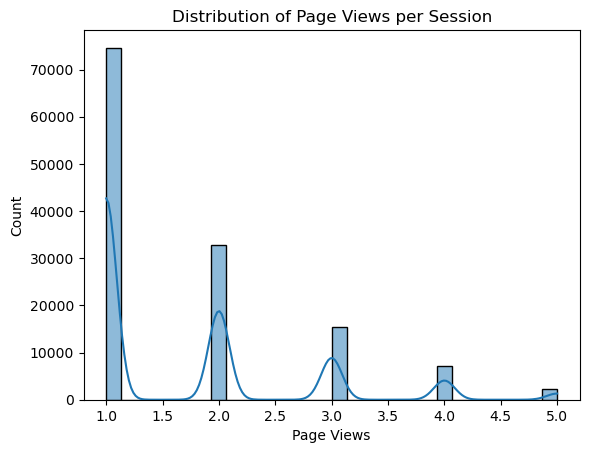

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Page Views per Session
sns.histplot(df['page'], bins=30, kde=True)
plt.title("Distribution of Page Views per Session")
plt.xlabel("Page Views")
plt.ylabel("Count")
plt.show()

In [6]:
df['bounced'] = df['page'].apply(lambda x: 1 if x == 1 else 0)

bounce_rate = df['bounced'].sum() / len(df) * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 56.38%


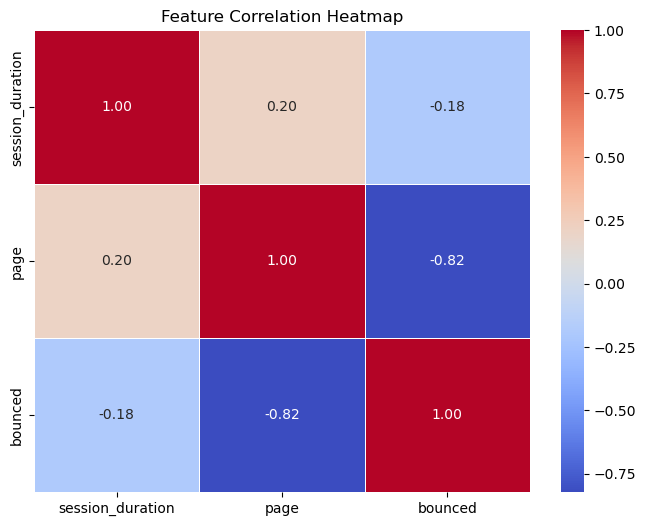

In [58]:
import seaborn as sns

# Compute correlation matrix

corr_matrix = df[['session_duration', 'page', 'bounced']].corr()

# Create Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
# Count sessions per weekday
df['weekday'] = df['session_date'].dt.weekday
df['hour'] = df['session_duration']/60
weekday_sessions = df['weekday'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], y=weekday_sessions.values)
plt.title("Sessions Per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Sessions")
plt.show()


NameError: name 'plt' is not defined

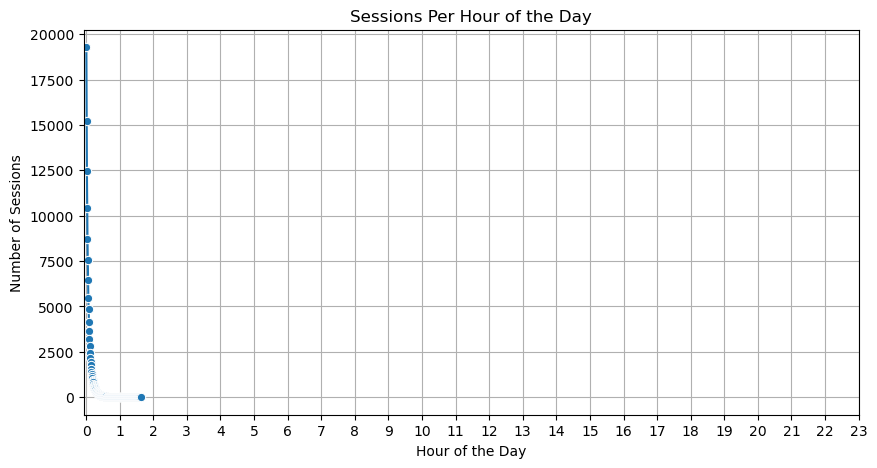

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count sessions per hour
hourly_sessions = df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sessions.index, y=hourly_sessions.values, marker='o')
plt.xticks(range(0, 24))
plt.title("Sessions Per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Sessions")
plt.grid()
plt.show()


In [68]:
df['session_duration']

# Group by Product Category & Sum Time Spent
category_time = df.groupby('page1_main_category')['session_duration'].sum().reset_index()

# Display results
print(category_time)


  page1_main_category  session_duration
0             blouses          174831.5
1                sale          197759.0
2              skirts          119911.0
3            trousers          156904.5


In [ ]:
page_mapping = {
    1: 'page1',
    2: 'page2',
    3: 'page3',
    4: 'page4',
    5: 'page5'
}
df['page_visited'] = df['page'].map(page_mapping)
df = df.sort_values(by=['session_id', 'page_visited'])

# Generate click sequence per session
df['click_sequence'] = df.groupby('session_id')['page_visited'].transform(lambda x: ' → '.join(x))
df_sequences = df[['session_id', 'click_sequence']].drop_duplicates()

df['is_revisit'] = df.duplicated(subset=['session_id', 'page_visited'], keep='first')

df_revisit_counts = df.groupby('session_id')['is_revisit'].sum().reset_index()
df_revisit_counts.columns = ['session_id', 'total_revisits']
# Display click sequences
print(df_revisit_counts)
